In [1]:
import numpy as np
import pandas as pd

In [2]:
drug = pd.read_csv('nc/NC_Drug_Poisoning.csv')
gdp = pd.read_csv('nc/NC_GDP.csv')
unemployment = pd.read_csv('nc/NC_Unemployment.csv')
unemployment = unemployment[1:]
unemployment


,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018
1,37001,NC,"Alamance County, NC",3.0,2.0,1.0,"69,983","66,446","3,537",5.1,...,79984,76611,3373,4.2,"80,583","77,625","2,958",3.7,"$50,480.00",93.6
2,37003,NC,"Alexander County, NC",2.0,2.0,1.0,"18,206","17,254",952,5.2,...,17982,17334,648,3.6,"18,023","17,453",570,3.2,"$49,138.00",91.1
3,37005,NC,"Alleghany County, NC",9.0,10.0,0.0,"4,898","4,645",253,5.2,...,4364,4145,219,5.0,"4,305","4,111",194,4.5,"$39,735.00",73.7
4,37007,NC,"Anson County, NC",6.0,4.0,0.0,"10,302","9,547",755,7.3,...,10530,9991,539,5.1,"10,407","9,942",465,4.5,"$38,023.00",70.5
5,37009,NC,"Ashe County, NC",7.0,10.0,0.0,"13,078","12,423",655,5.0,...,12669,12153,516,4.1,"12,750","12,292",458,3.6,"$41,864.00",77.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,37191,NC,"Wayne County, NC",3.0,2.0,1.0,"52,722","50,347","2,375",4.5,...,53422,50758,2664,5.0,"52,731","50,460","2,271",4.3,"$41,572.00",77.1
97,37193,NC,"Wilkes County, NC",6.0,3.0,0.0,"31,357","29,660","1,697",5.4,...,30930,29625,1305,4.2,"30,230","29,102","1,128",3.7,"$44,080.00",81.7
98,37195,NC,"Wilson County, NC",4.0,3.0,0.0,"40,724","38,173","2,551",6.3,...,35972,33397,2575,7.2,"35,342","33,175","2,167",6.1,"$44,015.00",81.6
99,37197,NC,"Yadkin County, NC",2.0,2.0,1.0,"19,086","18,271",815,4.3,...,17702,17011,691,3.9,"17,791","17,191",600,3.4,"$49,070.00",91.0


In [3]:
#cleaning up unemployment data
unemployment = unemployment.drop(["Civilian_labor_force_2010","Employed_2010","Unemployed_2010", "Civilian_labor_force_2011","Employed_2011","Unemployed_2011", "Civilian_labor_force_2012","Employed_2012","Unemployed_2012", "Civilian_labor_force_2013","Employed_2013","Unemployed_2013",
"Civilian_labor_force_2014","Employed_2014","Unemployed_2014",
"Civilian_labor_force_2015","Employed_2015","Unemployed_2015",
"Civilian_labor_force_2016","Employed_2016","Unemployed_2016",
"Civilian_labor_force_2017","Employed_2017","Unemployed_2017",
"Civilian_labor_force_2018","Employed_2018","Unemployed_2018","Med_HH_Income_Percent_of_State_Total_2018"], axis = 1)

unemployment = unemployment.rename(columns={"Metro_2013":"Metro Code 2008"})

unemployment["Rural_urban_continuum_code_2013"] = unemployment['Metro Code 2008']
unemployment = unemployment.rename(columns={"Rural_urban_continuum_code_2013":"Metro Code 2007"})
unemployment["Urban_influence_code_2013"] = unemployment['Metro Code 2008']
unemployment = unemployment.rename(columns={"Urban_influence_code_2013":"Metro Code 2009"})
unemployment["Civilian_labor_force_2007"] = unemployment['Metro Code 2008']
unemployment = unemployment.rename(columns={"Civilian_labor_force_2007":"Metro Code 2010"})
unemployment["Employed_2007"] = unemployment['Metro Code 2008']
unemployment = unemployment.rename(columns={"Employed_2007":"Metro Code 2011"})
unemployment["Unemployed_2007"] = unemployment['Metro Code 2008']
unemployment = unemployment.rename(columns={"Unemployed_2007":"Metro Code 2012"})
unemployment["Civilian_labor_force_2008"] = unemployment['Metro Code 2008']
unemployment = unemployment.rename(columns={"Civilian_labor_force_2008":"Metro Code 2013"})
unemployment["Employed_2008"] = unemployment['Metro Code 2008']
unemployment = unemployment.rename(columns={"Employed_2008":"Metro Code 2014"})
unemployment["Unemployed_2008"] = unemployment['Metro Code 2008']
unemployment = unemployment.rename(columns={"Unemployed_2008":"Metro Code 2015"})
unemployment["Civilian_labor_force_2009"] = unemployment['Metro Code 2008']
unemployment = unemployment.rename(columns={"Civilian_labor_force_2009":"Metro Code 2016"})
unemployment["Employed_2009"] = unemployment['Metro Code 2008']
unemployment = unemployment.rename(columns={"Employed_2009":"Metro Code 2017"})
unemployment["Unemployed_2009"] = unemployment['Metro Code 2008']
unemployment = unemployment.rename(columns={"Unemployed_2009":"Metro Code 2018"})

#unemployment = unemployment.insert(4, "Metro Code 2008", [unemployment.loc[:,'Metro Code 2007'].tolist()], allow_duplicates =True)

unemployment = unemployment.transpose()

unemployment.head()


,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
FIPS,37001,37003,37005,37007,37009,37011,37013,37015,37017,37019,...,37181,37183,37185,37187,37189,37191,37193,37195,37197,37199
State,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,...,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC
Area_name,"Alamance County, NC","Alexander County, NC","Alleghany County, NC","Anson County, NC","Ashe County, NC","Avery County, NC","Beaufort County, NC","Bertie County, NC","Bladen County, NC","Brunswick County, NC",...,"Vance County, NC","Wake County, NC","Warren County, NC","Washington County, NC","Watauga County, NC","Wayne County, NC","Wilkes County, NC","Wilson County, NC","Yadkin County, NC","Yancey County, NC"
Metro Code 2007,1,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
Metro Code 2009,1,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [4]:
years = unemployment[3:]
rate=years[6:]
rate = rate.sort_index(ascending=True)
med_income = rate.iloc[0]
rate = rate[7:-1]
rate

#transforming unemployment rate
urate = []
for i in range(11):
    urate.append(rate.iloc[i].tolist())  
urate

flat_list = []
for sublist in urate:
    for item in sublist:
        flat_list.append(item)
flat_list

#transforming median income, need to repeat each number 11 times
#problem with this is the only median income was reported in 2013 --> for more accurate analysis, need more data
print(med_income)

income_list = []
for i in range(11):
    income_list.append(med_income.tolist())
        
flat_list2 = []
for sublist in income_list:
    for item in sublist:
        flat_list2.append(item)


        



1      $50,480.00
2      $49,138.00
3      $39,735.00
4      $38,023.00
5      $41,864.00
          ...    
96     $41,572.00
97     $44,080.00
98     $44,015.00
99     $49,070.00
100    $44,756.00
Name: Median_Household_Income_2018, Length: 100, dtype: object


In [5]:
gdp = gdp.set_index('DATE').transpose()
gdp =gdp.reset_index()
gdp = gdp.melt(id_vars=["index"], 
        var_name="Year", 
        value_name="GDP")
gdp.columns=[
    'FIPS',
    'Year',
    'GDP'
]
gdp

,FIPS,Year,GDP
0,37001,2001,4617488
1,37003,2001,727224
2,37005,2001,311598
3,37007,2001,764382
4,37009,2001,665920
...,...,...,...
1795,37191,2018,4714200
1796,37193,2018,2103352
1797,37195,2018,3890550
1798,37197,2018,1053658


In [6]:
gdp['FIPS'] = gdp['FIPS'].astype(int)
gdp['Year'] = gdp['Year'].astype(int)
# unemployment['FIPS'] = unemployment['FIPS'].astype(int) 
drug['FIPS'] = drug['FIPS'].astype(int)
drug['Year'] = drug['Year'].astype(int)

# merged1 = gdp.merge(unemployment, left_on='FIPS', right_on='FIPS')
# merged2 = merged1.merge(pop, left_on='FIPS', right_on='FIPS')
drug

,FIPS,Year,State,FIPS State,County,Population,Model-based Death Rate,Standard Deviation,Lower Confidence Limit,Upper Confidence Limit,Urban/Rural Category,Census Division
0,37001,2003,North Carolina,37,"Alamance County, NC","136,009",8.325865,1.472936,5.869787,11.628557,Small Metro,5
1,37001,2004,North Carolina,37,"Alamance County, NC","137,619",6.816017,1.245430,4.756550,9.625559,Small Metro,5
2,37001,2005,North Carolina,37,"Alamance County, NC","139,311",10.054781,1.705765,7.177474,13.849974,Small Metro,5
3,37001,2006,North Carolina,37,"Alamance County, NC","141,462",10.505840,1.760729,7.529669,14.417620,Small Metro,5
4,37001,2007,North Carolina,37,"Alamance County, NC","144,712",10.705740,1.778055,7.693931,14.650021,Small Metro,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,37199,2013,North Carolina,37,"Yancey County, NC","17,552",21.791616,4.534396,14.567410,32.272398,Noncore,5
1496,37199,2014,North Carolina,37,"Yancey County, NC","17,546",26.373803,5.391388,17.734512,38.789760,Noncore,5
1497,37199,2015,North Carolina,37,"Yancey County, NC","17,559",25.508153,5.230173,17.129977,37.554993,Noncore,5
1498,37199,2016,North Carolina,37,"Yancey County, NC","17,622",27.626727,5.617800,18.607097,40.547113,Noncore,5


In [7]:
new_drug = drug[drug['Year']>2006]
new_drug.head()

,FIPS,Year,State,FIPS State,County,Population,Model-based Death Rate,Standard Deviation,Lower Confidence Limit,Upper Confidence Limit,Urban/Rural Category,Census Division
4,37001,2007,North Carolina,37,"Alamance County, NC","144,712",10.705740,1.778055,7.693931,14.650021,Small Metro,5
5,37001,2008,North Carolina,37,"Alamance County, NC","147,704",13.714844,2.137914,10.037906,18.405900,Small Metro,5
6,37001,2009,North Carolina,37,"Alamance County, NC","149,954",12.504934,1.987376,9.104648,16.882437,Small Metro,5
7,37001,2010,North Carolina,37,"Alamance County, NC","151,198",9.651690,1.624537,6.911048,13.265765,Small Metro,5
8,37001,2011,North Carolina,37,"Alamance County, NC","152,857",13.099734,2.048484,9.581689,17.599505,Small Metro,5


In [66]:
new_df = pd.merge(gdp, new_drug,  how='right', left_on=['FIPS','Year'], right_on = ['FIPS','Year'])
new_df = new_df.drop(["Census Division"], axis = 1)

metro = []
for i in range(1100):
    if new_df['Urban/Rural Category'].iloc[i] == "Noncore":
        metro.append(0)
    else:
        metro.append(1)

new_df["Metro Code"] = metro
new_df = new_df.drop(["Urban/Rural Category"], axis = 1)
new_df["Unemployment Rate"] = flat_list
new_df["Median Income"] = flat_list2
new_df

,FIPS,Year,GDP,State,FIPS State,County,Population,Model-based Death Rate,Standard Deviation,Lower Confidence Limit,Upper Confidence Limit,Metro Code,Unemployment Rate,Median Income
0,37001,2007,5306622,North Carolina,37,"Alamance County, NC","144,712",10.705740,1.778055,7.693931,14.650021,1,5.1,"$50,480.00"
1,37003,2007,795721,North Carolina,37,"Alexander County, NC","36,609",18.836393,3.640613,12.904131,27.130432,1,5.2,"$49,138.00"
2,37005,2007,319131,North Carolina,37,"Alleghany County, NC","11,061",17.426167,3.830240,11.439603,26.384358,0,5.2,"$39,735.00"
3,37007,2007,762762,North Carolina,37,"Anson County, NC","26,664",11.725714,2.486966,7.789710,17.498755,0,7.3,"$38,023.00"
4,37009,2007,709296,North Carolina,37,"Ashe County, NC","26,506",16.769407,3.419842,11.287649,24.643601,0,5.0,"$41,864.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,37191,2017,4702700,North Carolina,37,"Wayne County, NC","124,172",17.190948,2.651364,12.620740,22.998823,1,5.0,"$41,572.00"
1096,37193,2017,2132974,North Carolina,37,"Wilkes County, NC","68,576",32.328687,4.921502,23.828649,43.093895,0,4.2,"$44,080.00"
1097,37195,2017,3830882,North Carolina,37,"Wilson County, NC","81,671",16.376801,2.818828,11.633850,22.659454,1,7.2,"$44,015.00"
1098,37197,2017,1078335,North Carolina,37,"Yadkin County, NC","37,774",25.466540,4.663185,17.751179,35.980974,1,3.9,"$49,070.00"


In [10]:
import seaborn as sns
import matplotlib as plt

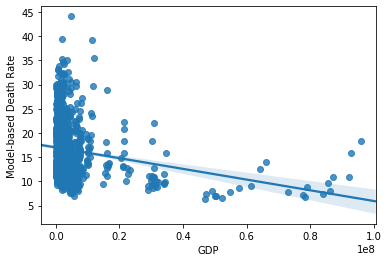

In [74]:
ax = sns.regplot(x = "GDP", y="Model-based Death Rate", data=new_df)

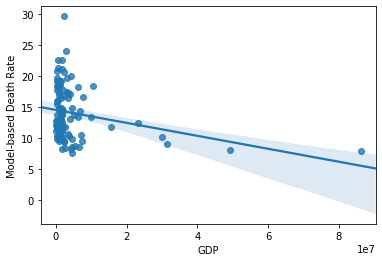

In [79]:
ax = sns.regplot(x = "GDP", y="Model-based Death Rate", data=new_df.query('Year==2008'))

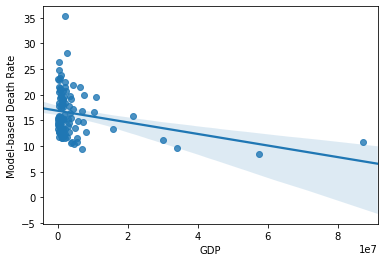

In [80]:
ax = sns.regplot(x = "GDP", y="Model-based Death Rate", data=new_df.query('Year==2014'))

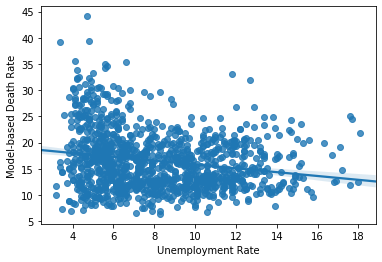

In [81]:
ax = sns.regplot(x = "Unemployment Rate", y="Model-based Death Rate", data=new_df)

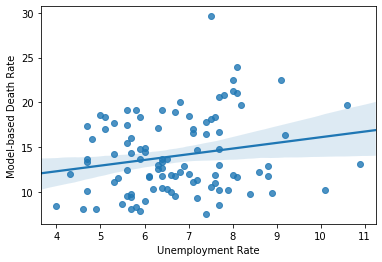

In [82]:
ax = sns.regplot(x = "Unemployment Rate", y="Model-based Death Rate", data=new_df.query('Year==2008'))

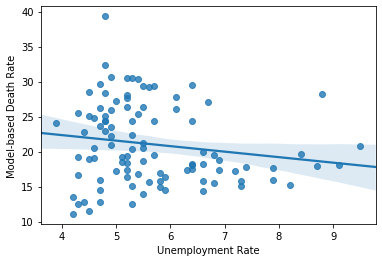

In [83]:
ax = sns.regplot(x = "Unemployment Rate", y="Model-based Death Rate", data=new_df.query('Year==2016'))

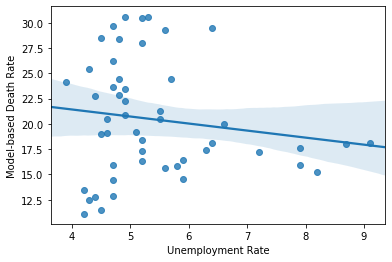

In [87]:
ax = sns.regplot(x = "Unemployment Rate", y="Model-based Death Rate", data=new_df.query('`Metro Code`==1').query('Year==2016'))

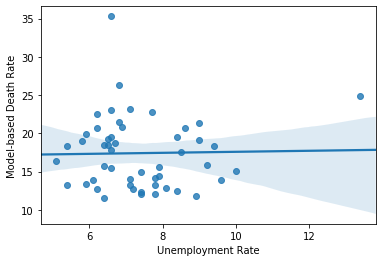

In [86]:
ax = sns.regplot(x = "Unemployment Rate", y="Model-based Death Rate", data=new_df.query('`Metro Code`==0').query('Year==2016'))